190185D 
Gajaanan S.

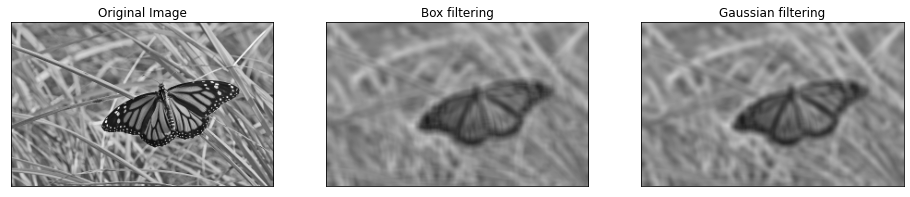

In [77]:
#Q1
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None

k_size = 9
sigma = 4
box = 1./81.*np.ones((k_size,k_size))
ib = cv.filter2D(img,-1,box)
ig = cv.GaussianBlur(img,(k_size,k_size),sigma)

fig, axes  = plt.subplots(1,3, figsize=(16,16))
axes[0].imshow(img, cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original Image')
axes[1].imshow(ib, cmap='gray',vmin=0,vmax=255)
axes[1].set_title('Box filtering')
axes[2].imshow(ig, cmap='gray',vmin=0,vmax=255)
axes[2].set_title('Gaussian filtering')
for i in range(3):
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.show()

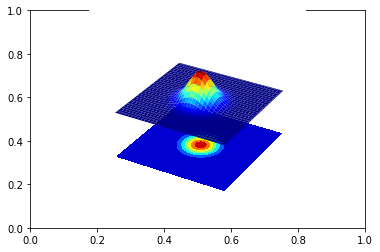

In [80]:
#Q2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

step = 0.1
X = np.arange (-5, 5+ step, step)
Y = np.arange (-5, 5+ step, step)
XX, YY = np.meshgrid (X, Y)

sigma=1.
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
surf = ax.plot_surface (XX, YY, g, cmap=cm.jet)
cset = ax.contourf (XX, YY, g, zdir='z', offset=np.min(g) - 1.5, cmap=cm.jet) 
ax.set_zlim(np.min (g) -2, np.max (g))

plt.axis('off')
plt.show()

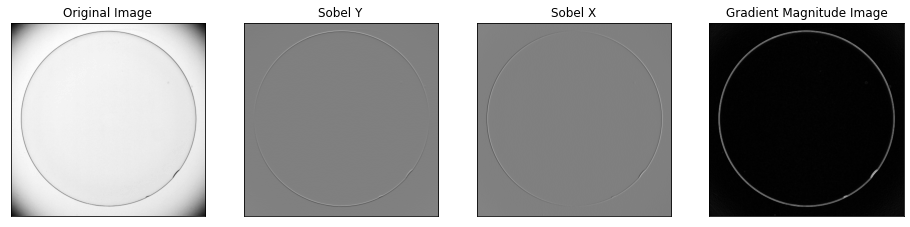

In [63]:
#Q3
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)

assert img is not None

kernel = np.array([(1, 2, 1), (0, 0, 0), (-1, -2, -1)], dtype=np.float32)
sobely = cv.filter2D(img,-1,kernel)

kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype=np.float32)
sobelx = cv.filter2D(img,-1,kernel)

grad_mag = np.sqrt(sobelx**2 + sobely**2)

fig, axes  = plt.subplots(1,4, figsize=(16,16))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(sobely, cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('Sobel Y')
axes[2].imshow(sobelx, cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_title('Sobel X')
axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')
for i in range(4):
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.show()

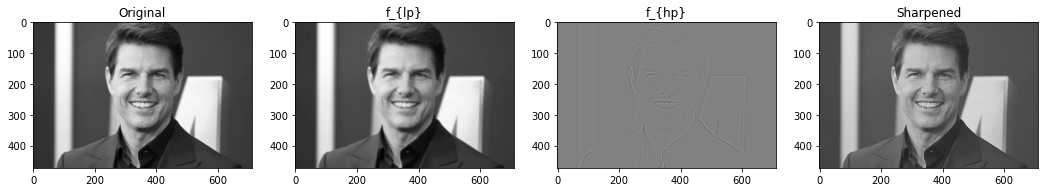

In [73]:
#Q4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread (r'tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sigma = 2

gaussian_ld = cv.getGaussianKernel (5, sigma)
f_lp = cv.sepFilter2D (f, -1, gaussian_ld, gaussian_ld)
f_hp = f-f_lp
f_sharpened = cv.addWeighted(f, 1.0, f_hp, 1.0, 0)

fig, ax = plt.subplots (1,4, figsize=(18,6))
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow (f_lp, cmap='gray')
ax[1].set_title(r'f_{lp}')
ax[2].imshow (f_hp,cmap='gray')
ax[2].set_title(r'f_{hp}')
ax[3].imshow(f_sharpened, cmap="gray")
ax[3].set_title(r'Sharpened')

for i in range(2):
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.show()